![Alt text](https://imgur.com/orZWHly.png=80)
source: @allison_horst https://github.com/allisonhorst/penguins

You have been asked to support a team of researchers who have been collecting data about penguins in Antartica! The data is available in csv-Format as `penguins.csv`

**Origin of this data** : Data were collected and made available by Dr. Kristen Gorman and the Palmer Station, Antarctica LTER, a member of the Long Term Ecological Research Network.

**The dataset consists of 5 columns.**

Column | Description
--- | ---
culmen_length_mm | culmen length (mm)
culmen_depth_mm | culmen depth (mm)
flipper_length_mm | flipper length (mm)
body_mass_g | body mass (g)
sex | penguin sex

Unfortunately, they have not been able to record the species of penguin, but they know that there are **at least three** species that are native to the region: **Adelie**, **Chinstrap**, and **Gentoo**.  Your task is to apply your data science skills to help them identify groups in the dataset!

In [13]:
# Import Required Packages
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import plotly.express as px
from sklearn.cluster import KMeans
from sklearn.preprocessing import StandardScaler

# Loading and examining the dataset
penguins_df = pd.read_csv("penguins.csv")
penguins_df.head()

,culmen_length_mm,culmen_depth_mm,flipper_length_mm,body_mass_g,sex
0,39.1,18.7,181.0,3750.0,MALE
1,39.5,17.4,186.0,3800.0,FEMALE
2,40.3,18.0,195.0,3250.0,FEMALE
3,36.7,19.3,193.0,3450.0,FEMALE
4,39.3,20.6,190.0,3650.0,MALE


In [14]:
penguins_df.describe()

,culmen_length_mm,culmen_depth_mm,flipper_length_mm,body_mass_g
count,332.000000,332.000000,332.000000,332.000000
mean,44.021084,17.153012,200.975904,4206.475904
std,5.452462,1.960275,14.035971,806.361278
min,32.100000,13.100000,172.000000,2700.000000
25%,39.500000,15.600000,190.000000,3550.000000
50%,44.700000,17.300000,197.000000,4025.000000
75%,48.625000,18.700000,213.000000,4781.250000
max,59.600000,21.500000,231.000000,6300.000000


In [15]:
penguins_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 332 entries, 0 to 331
Data columns (total 5 columns):
 #   Column             Non-Null Count  Dtype  
---  ------             --------------  -----  
 0   culmen_length_mm   332 non-null    float64
 1   culmen_depth_mm    332 non-null    float64
 2   flipper_length_mm  332 non-null    float64
 3   body_mass_g        332 non-null    float64
 4   sex                332 non-null    object 
dtypes: float64(4), object(1)
memory usage: 13.1+ KB


In [16]:
# fig = px.histogram(penguins_df, x='flipper_length_mm', color = 'sex', width=1000, opacity=.8, histnorm='probability')
fig = px.scatter_3d(penguins_df, x='culmen_length_mm', y='flipper_length_mm', width=1000, height=1000, z = 'culmen_depth_mm', size='body_mass_g', size_max=25, opacity=.8)
fig.show()

## Preparation of features

In [17]:
X_dummies = pd.get_dummies(penguins_df['sex'], drop_first = True).values
X_num = penguins_df.drop('sex', axis = 1).values

### Scale

In [18]:
scaler = StandardScaler()

X_scaled = scaler.fit_transform(X_num)

### Concat scaled features with dummies

In [ ]:
X = np.concatenate([X_scaled, X_dummies], axis = 1)

## Model Training

### Elbow Test

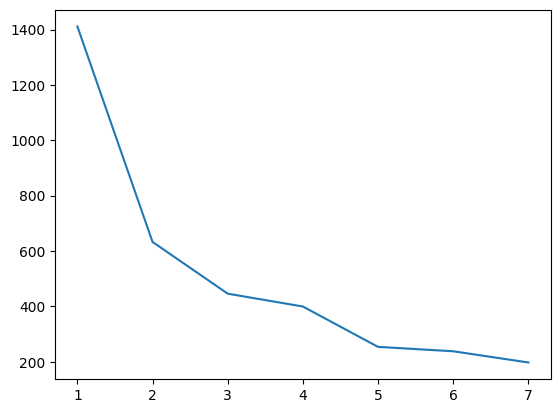

In [20]:
inertias = {}
for i in range(1, 8):
    knn = KMeans(i)
    knn.fit_predict(X)
    inertias[i] = knn.inertia_
plt.plot(inertias.keys(), inertias.values())
plt.show()

### Model

In [21]:
knn = KMeans(n_clusters = 3)
clusters = knn.fit_predict(X)
print(knn.inertia_)

446.0310770316985


## Test the Results

In [22]:
penguins_df_test = penguins_df.copy()
penguins_df_test['cluster'] = clusters

In [23]:
fig = px.scatter_3d(penguins_df_test, x='culmen_length_mm', y='flipper_length_mm', width=1000, height=1000, z = 'culmen_depth_mm', size='body_mass_g', size_max=25, color = 'cluster', symbol = 'sex')
fig.show()

In [24]:
stat_penguins = penguins_df_test.groupby(['cluster']).agg(culmen_length_mm_mean=('culmen_length_mm', 'mean'), culmen_depth_mm_mean=('culmen_depth_mm', 'mean'), flipper_length_mm_mean=('flipper_length_mm', 'mean'), body_mass_g_mean=('body_mass_g', 'mean')).reset_index()